# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [37]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?appid={api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | conde
Processing Record 2 of Set 1 | peterhead
Processing Record 3 of Set 1 | theodore
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | ust-nera
Processing Record 7 of Set 1 | sechura
Processing Record 8 of Set 1 | puerto baquerizo moreno
Processing Record 9 of Set 1 | gadzhiyevo
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | coquimbo
Processing Record 12 of Set 1 | uturoa
Processing Record 13 of Set 1 | lompoc
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | zhongxing
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | al bardiyah
Processing Record 21 of Set 1 | huangmei
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of

Processing Record 41 of Set 4 | thief river falls
Processing Record 42 of Set 4 | newman
Processing Record 43 of Set 4 | las tablas
Processing Record 44 of Set 4 | lucapa
Processing Record 45 of Set 4 | pisco
Processing Record 46 of Set 4 | kilinochchi
Processing Record 47 of Set 4 | punta arenas
Processing Record 48 of Set 4 | colonia
Processing Record 49 of Set 4 | vorgashor
Processing Record 0 of Set 5 | haiku-pauwela
Processing Record 1 of Set 5 | kristiansund
Processing Record 2 of Set 5 | mstsislaw
Processing Record 3 of Set 5 | vilyuchinsk
Processing Record 4 of Set 5 | palu
Processing Record 5 of Set 5 | am djarass
City not found. Skipping...
Processing Record 6 of Set 5 | west island
Processing Record 7 of Set 5 | bandarbeyla
Processing Record 8 of Set 5 | kill devil hills
Processing Record 9 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 10 of Set 5 | opuwo
Processing Record 11 of Set 5 | praya
Processing Record 12 of Set 5 | talnakh
Processing Record 13 o

Processing Record 33 of Set 8 | east london
Processing Record 34 of Set 8 | groningen
Processing Record 35 of Set 8 | storesti
Processing Record 36 of Set 8 | cidade velha
Processing Record 37 of Set 8 | mahina
Processing Record 38 of Set 8 | gejiu
Processing Record 39 of Set 8 | caconda
Processing Record 40 of Set 8 | lakhnadon
Processing Record 41 of Set 8 | juneau
Processing Record 42 of Set 8 | nueva helvecia
Processing Record 43 of Set 8 | bawshar
Processing Record 44 of Set 8 | carloforte
Processing Record 45 of Set 8 | talakan
Processing Record 46 of Set 8 | katsuura
Processing Record 47 of Set 8 | fredericksburg
Processing Record 48 of Set 8 | ulsteinvik
Processing Record 49 of Set 8 | khovd
Processing Record 0 of Set 9 | tual
Processing Record 1 of Set 9 | thurso
Processing Record 2 of Set 9 | gudauri
City not found. Skipping...
Processing Record 3 of Set 9 | hilo
Processing Record 4 of Set 9 | shajiang
Processing Record 5 of Set 9 | bochum
Processing Record 6 of Set 9 | yeppo

Processing Record 25 of Set 12 | aberdeen
Processing Record 26 of Set 12 | lihue
Processing Record 27 of Set 12 | ghadamis
Processing Record 28 of Set 12 | malanje
Processing Record 29 of Set 12 | ar rahad
-----------------------------
Data Retrieval Complete      
-----------------------------


In [38]:
city_url

'http://api.openweathermap.org/data/2.5/weather?appid=b0c825d25ede774cd834224ae92733e3&q=ar rahad'

In [39]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [40]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,conde,-7.2597,-34.9075,300.85,65,40,7.20,BR,1691259288
1,peterhead,57.5058,-1.7981,287.29,66,100,3.20,GB,1691259289
2,theodore,30.5477,-88.1753,310.31,51,0,2.06,US,1691259289
3,stanley,54.8680,-1.6985,286.16,82,40,5.14,GB,1691259105
4,bethel,41.3712,-73.4140,301.42,58,0,4.63,US,1691259289


In [41]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 5E94-16FB

 Directory of C:\Users\wnaiy\OneDrive\Desktop\Starter_Code\starter_code

08/05/2023  02:14 PM    <DIR>          .
08/03/2023  10:43 PM    <DIR>          ..
08/04/2023  12:39 AM    <DIR>          .ipynb_checkpoints
08/03/2023  10:44 PM    <DIR>          __pycache__
08/03/2023  10:43 PM               110 api_keys.py
08/05/2023  02:05 PM    <DIR>          output_data
08/03/2023  10:43 PM         7,649,506 VacationPy.ipynb
08/05/2023  02:14 PM           458,785 WeatherPy.ipynb
               3 File(s)      8,108,401 bytes
               5 Dir(s)  423,689,076,736 bytes free


In [42]:
import os

# Create the output_data directory if it doesn't exist
output_dir = "output_data"
os.makedirs(output_dir, exist_ok=True)

# Export the City_Data into a csv
city_data_df.to_csv(os.path.join(output_dir, "cities.csv"), index_label="City_ID")


In [43]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [44]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,conde,-7.2597,-34.9075,300.85,65,40,7.20,BR,1691259288
1,peterhead,57.5058,-1.7981,287.29,66,100,3.20,GB,1691259289
2,theodore,30.5477,-88.1753,310.31,51,0,2.06,US,1691259289
3,stanley,54.8680,-1.6985,286.16,82,40,5.14,GB,1691259105
4,bethel,41.3712,-73.4140,301.42,58,0,4.63,US,1691259289


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

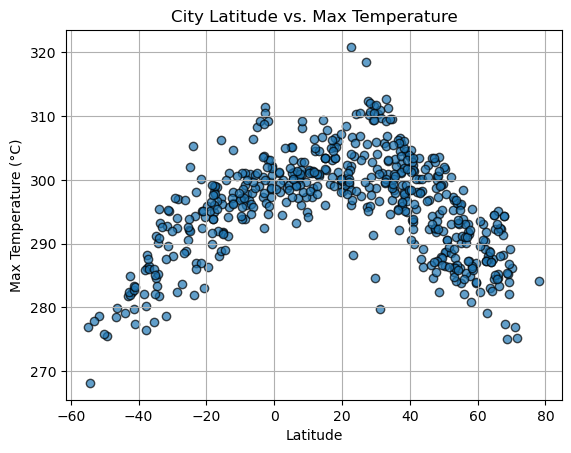

In [45]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

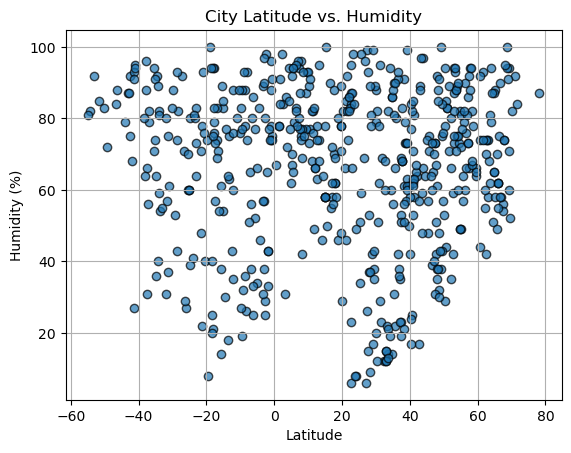

In [46]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.7)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

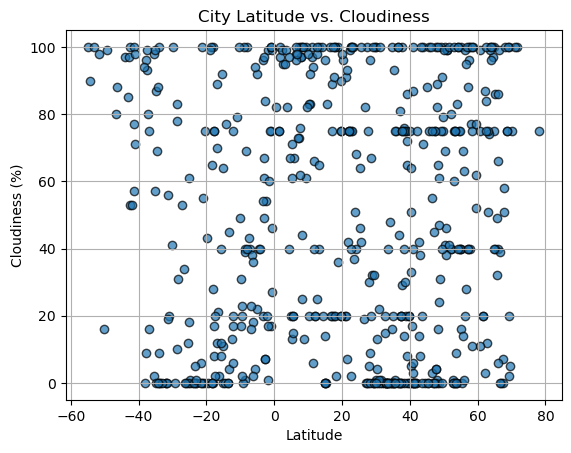

In [47]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.7)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

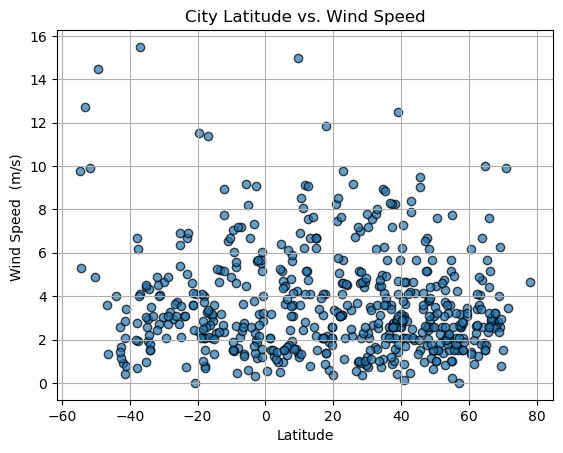

In [48]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed  (m/s) ")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
import scipy.stats as st

In [101]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, x_label, y_label, hemisphere):
    slope, intercept, r_value, _, _ = st.linregress(x, y)
    regress_values = x * slope + intercept

    plt.scatter(x, y, edgecolors="black", alpha=0.7)
    plt.plot(x, regress_values, "r-")

    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared = f"R² = {r_value**2:.2f}"
    plt.annotate(equation, (min(x), max(y)), fontsize=12, color="red")
    plt.annotate(r_squared, (min(x), max(y) - 10), fontsize=12, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} - {x_label} vs. {y_label}")
    plt.grid(True)
    plt.savefig(f"output_data/{hemisphere}_{x_label.replace(' ', '')}_vs_{y_label.replace(' ', '')}.png")
    plt.show()


In [108]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,peterhead,57.5058,-1.7981,287.29,66,100,3.20,GB,1691259289
2,theodore,30.5477,-88.1753,310.31,51,0,2.06,US,1691259289
3,stanley,54.8680,-1.6985,286.16,82,40,5.14,GB,1691259105
4,bethel,41.3712,-73.4140,301.42,58,0,4.63,US,1691259289
5,ust-nera,64.5667,143.2000,287.60,51,97,1.82,RU,1691259289


In [109]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,conde,-7.2597,-34.9075,300.85,65,40,7.20,BR,1691259288
6,sechura,-5.5569,-80.8222,300.69,52,4,4.49,PE,1691259289
7,puerto baquerizo moreno,-0.9000,-89.6000,299.70,74,75,5.14,EC,1691259143
10,coquimbo,-29.9533,-71.3436,288.00,88,100,4.63,CL,1691259157
11,uturoa,-16.7333,-151.4333,298.90,74,12,3.24,PF,1691259290


###  Temperature vs. Latitude Linear Regression Plot

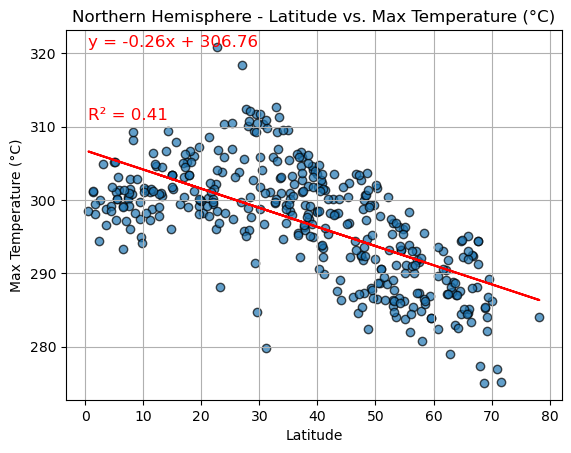

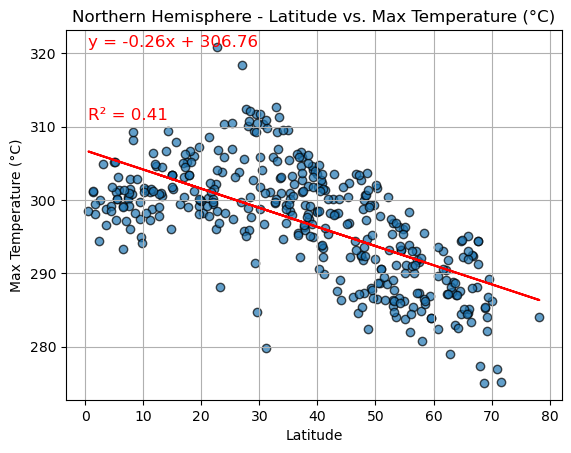

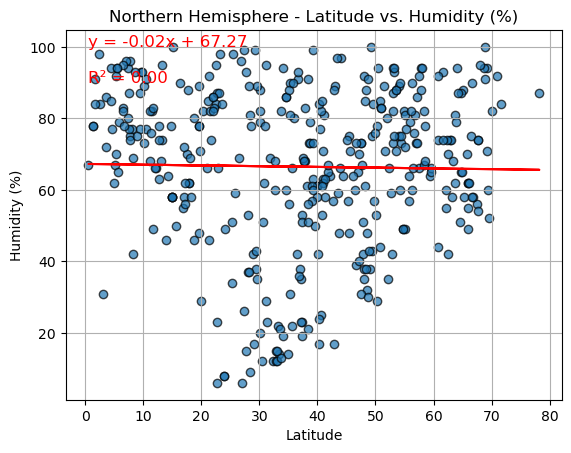

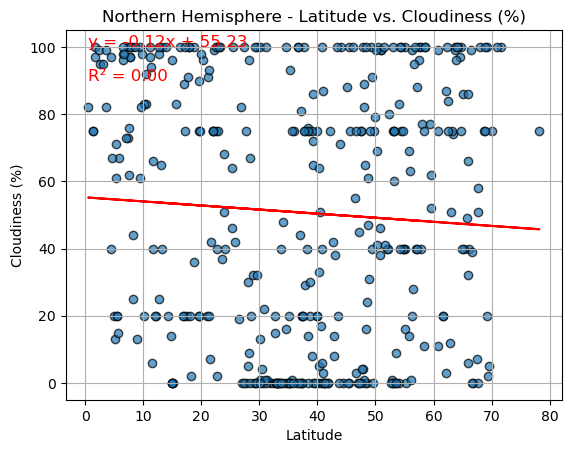

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Northern Hemisphere_Latitude_vs_WindSpeed(m/s).png'

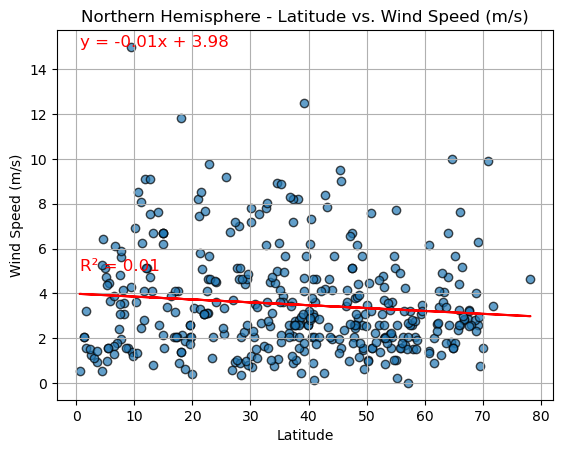

In [110]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Northern Hemisphere")

# Linear regression on all weather variables for Northern Hemisphere
plot_weather_relationships(northern_hemi_df, "Northern Hemisphere")


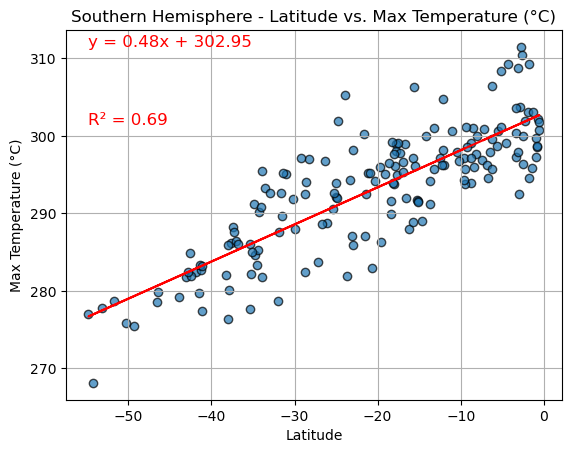

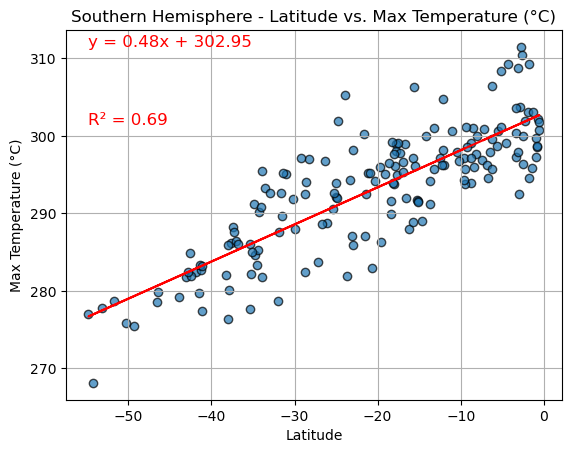

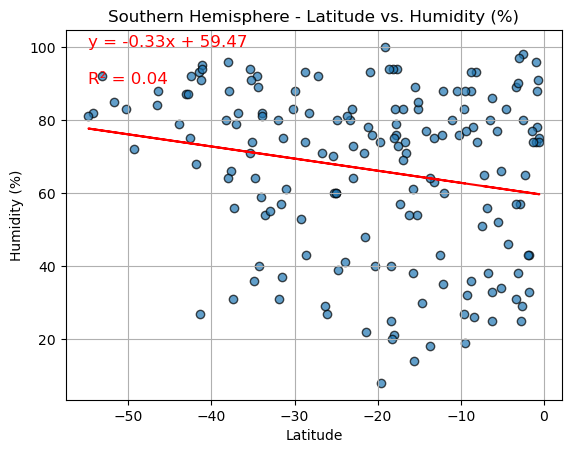

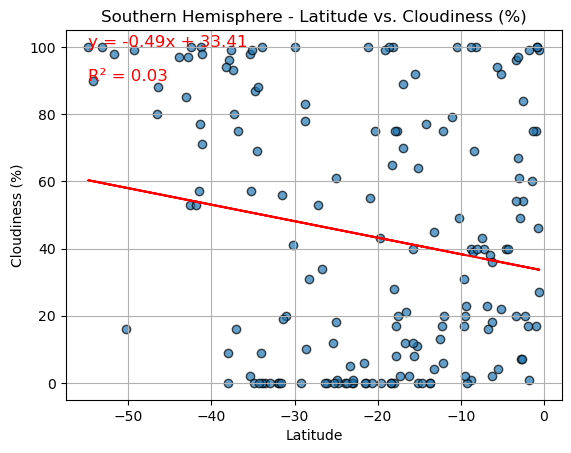

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Southern Hemisphere_Latitude_vs_WindSpeed(m/s).png'

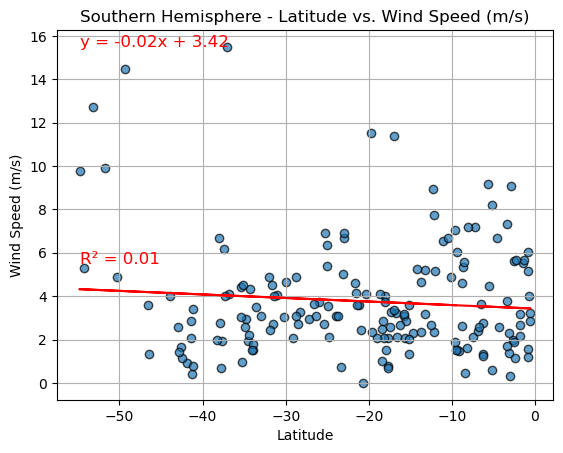

In [121]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Southern Hemisphere")

# Linear regression on all weather variables for Northern Hemisphere
plot_weather_relationships(southern_hemi_df, "Southern Hemisphere")


**Discussion about the linear relationship:** 

**Analyzing weather variables across hemispheres, we found that Max Temperature demonstrates a clear correlation with latitude, rising towards the equator in the Southern Hemisphere and falling in the Northern Hemisphere. For Humidity, Cloudiness, and Wind Speed, latitude's influence is less pronounced, with other factors playing significant roles. In essence, latitude's role varies across weather variables, highlighting the complexity of climate patterns.**

### Humidity vs. Latitude Linear Regression Plot

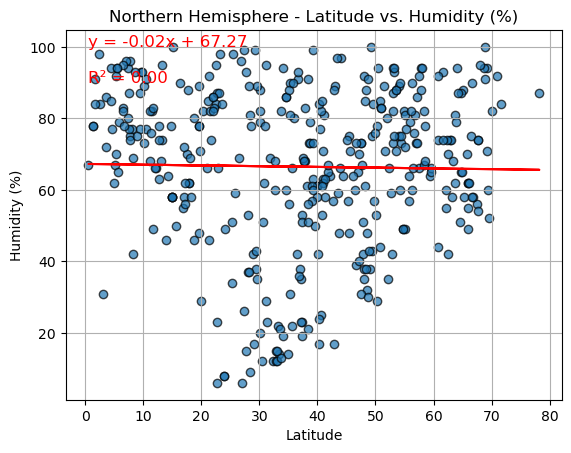

In [112]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Northern Hemisphere")

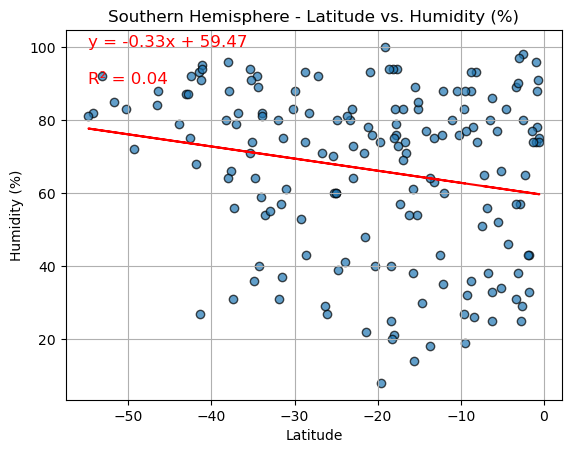

In [114]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Southern Hemisphere")

**Discussion about the linear relationship:** 
**Analyzing the interplay between Humidity and Latitude in both the Northern and Southern Hemispheres, the scatter plots suggest a subdued linear trend. In the Northern Hemisphere, as latitude increases, the data points indicate a gentle inclination for humidity to rise. Similarly, in the Southern Hemisphere, the data points reveal a subtle tendency for humidity to increase as one moves closer to the equator. The respective regression lines reflect these tendencies, with slight upward slopes. However, the low R-squared values indicate that latitude has limited explanatory power over humidity variations in both hemispheres. Other influential factors significantly shape humidity levels. To conclude, while a mild connection between humidity and latitude is observed, its influence remains modest, with various factors playing a substantial role in shaping humidity trends across both hemispheres.**

### Cloudiness vs. Latitude Linear Regression Plot

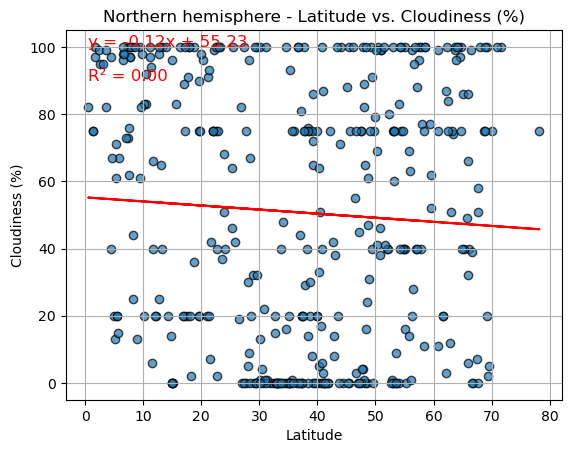

In [116]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern hemisphere")

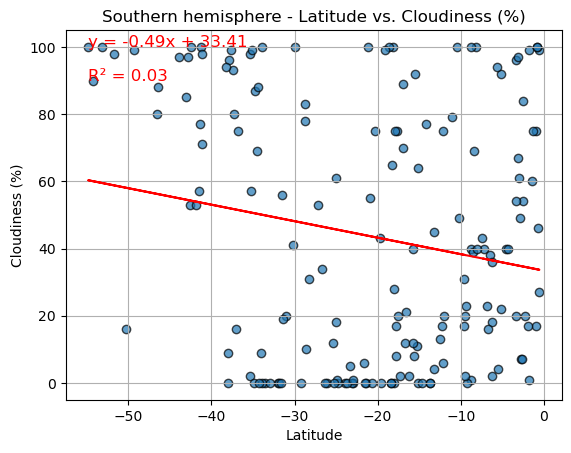

In [117]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern hemisphere")

**Discussion about the linear relationship:**
**Cloudiness in both hemispheres shows a subtle connection to Latitude. Scatter plots and regression lines suggest a slight increase in cloudiness as latitude changes. However, the low R-squared values indicate that latitude has limited explanatory power. Cloudiness variations are influenced by diverse factors beyond latitude.**

### Wind Speed vs. Latitude Linear Regression Plot

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Northern hemisphere_Latitude_vs_WindSpeed(m/s).png'

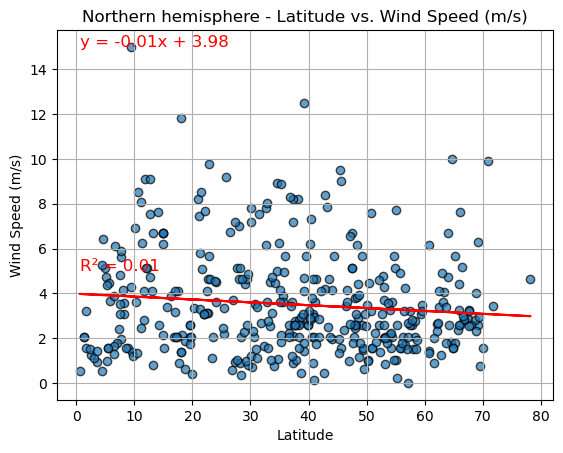

In [118]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Northern hemisphere")


FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Southern hemisphere_Latitude_vs_WindSpeed(m/s).png'

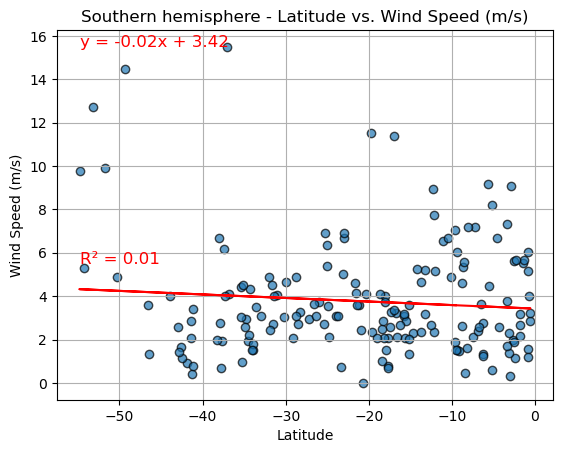

In [120]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Southern hemisphere")

**Discussion about the linear relationship:**

**Analyzing Wind Speed in relation to Latitude, the data in both the Northern and Southern Hemispheres show a subtle linear trend. In the Northern Hemisphere, the regression line's slight incline indicates a minor increase in wind speed as one moves towards higher latitudes. Similarly, in the Southern Hemisphere, a mild incline suggests a slight rise in wind speed with proximity to the equator. Despite these trends, the low R-squared values imply that latitude's influence on wind speed variations is limited in both hemispheres. Other factors play a more significant role in shaping wind speed. In summary, while a mild connection between wind speed and latitude is observed, its impact remains modest, with various factors contributing to wind speed fluctuations.**